In [1]:
from scipy.stats import entropy
import pandas
import numpy
from tqdm import tqdm
import sys
import seaborn
import matplotlib
pandas.set_option('display.max_columns', None)

In [2]:
import subprocess
import os.path

def instanciate_runner(executable_path):
    if os.path.exists(executable_path):
        def execute_experiment( input_file:str, output_file:str, input_size:int, extractions:int,
                                log_pivot_time = 0, log_iteration_time = 0, log_extraction_time = 0,
                                use_bfprt = 0, use_iiqs = 0, set_bfprt_alpha = 0.3, set_bfprt_beta = 0.7, set_random_seed = 42 ):

            arguments = [('--log-pivot-time=' + str(log_pivot_time)),
            ('--log-iteration-time=' + str(log_iteration_time)),
            ('--log-extraction-time=' + str(log_extraction_time)),
            ('--use-bfprt=' + str(use_bfprt)),
            ('--use-iiqs=' + str(use_iiqs)),
            ('--set-bfprt-alpha=' + str(set_bfprt_alpha)),
            ('--set-bfprt-beta=' + str(set_bfprt_beta)),
            ('--set-random-seed=' + str(set_random_seed)),
            ('--input-file=' + str(input_file)),
            ('--output-file=' + str(output_file)),
            ('--input-size=' + str(input_size)),
            ('--extractions=' + str(extractions))]
            print(" ".join([''+executable_path] + arguments))
            result = subprocess.run(" ".join([''+executable_path] + arguments), shell=True,  stdout=subprocess.PIPE)
            print(result.stdout.decode('utf-8'))
            return result
        return execute_experiment
    else:
        return None

In [3]:
runner = instanciate_runner('/home/kuky_nekoi/magicode/program/base_benchmark/main')

In [4]:
result = runner('/home/kuky_nekoi/magicode/program/base_benchmark/test_data/N_6.fold_5.ascii', 
                '/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii', 
                10**6, 10**5, log_extraction_time=1, log_iteration_time=1, log_pivot_time=1)
result_df = pandas.read_csv("/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii")

/home/kuky_nekoi/magicode/program/base_benchmark/main --log-pivot-time=1 --log-iteration-time=1 --log-extraction-time=1 --use-bfprt=0 --use-iiqs=0 --set-bfprt-alpha=0.3 --set-bfprt-beta=0.7 --set-random-seed=42 --input-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/N_6.fold_5.ascii --output-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii --input-size=1000000 --extractions=100000
Amount of snapshots: 400030




Text(0.5, 1.0, 'Executed Partitions')

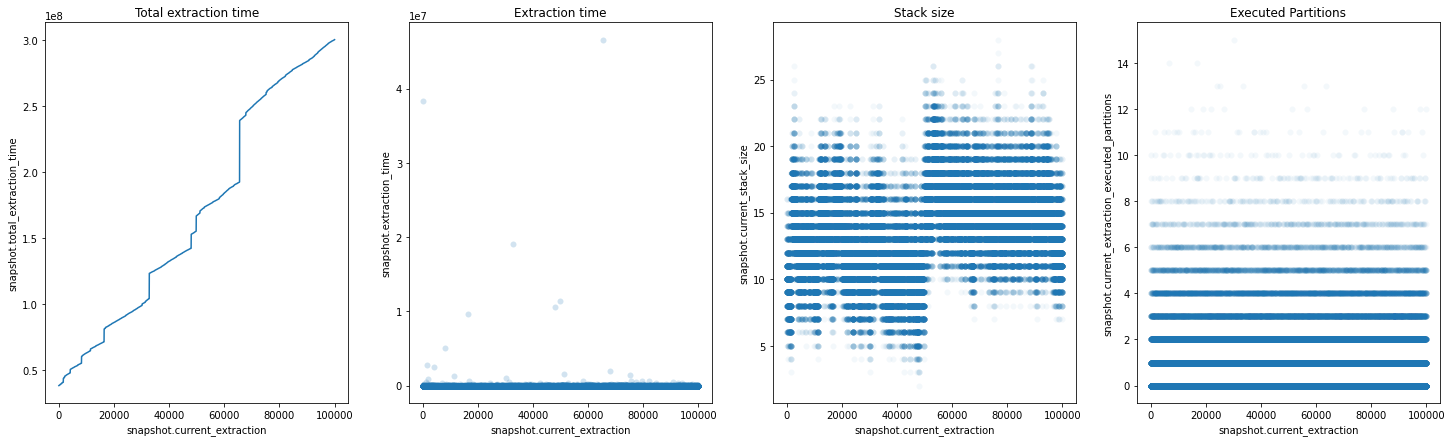

In [5]:
plot_df = result_df[result_df["snapshot.snapshot_point"] == "EXTRACTION_STAGE_END"]

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=4, figsize=(25, 7))
#hue = "format_quality"
#hues = df_sample[hue].unique()
#palette = dict(zip(hues, seaborn.color_palette("hls", len(hues))))
seaborn.lineplot(x="snapshot.current_extraction", y="snapshot.total_extraction_time", data=plot_df, ax=axes[0]).set_title("Total extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.extraction_time", data=plot_df, linewidth=0, alpha=0.2, ax=axes[1]).set_title("Extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.current_stack_size", data=plot_df, linewidth=0, alpha=0.05, ax=axes[2]).set_title("Stack size")
seaborn.scatterplot(plot_df["snapshot.current_extraction"], plot_df["snapshot.current_extraction_executed_partitions"], linewidth=0, alpha=0.05, ax=axes[3]).set_title("Executed Partitions")

/home/kuky_nekoi/magicode/program/base_benchmark/main --log-pivot-time=0 --log-iteration-time=0 --log-extraction-time=1 --use-bfprt=0 --use-iiqs=0 --set-bfprt-alpha=0.3 --set-bfprt-beta=0.7 --set-random-seed=42 --input-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/N_7_sorted.ascii --output-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii --input-size=1000000 --extractions=100000
Amount of snapshots: 100000




Text(0.5, 1.0, 'Executed Partitions')

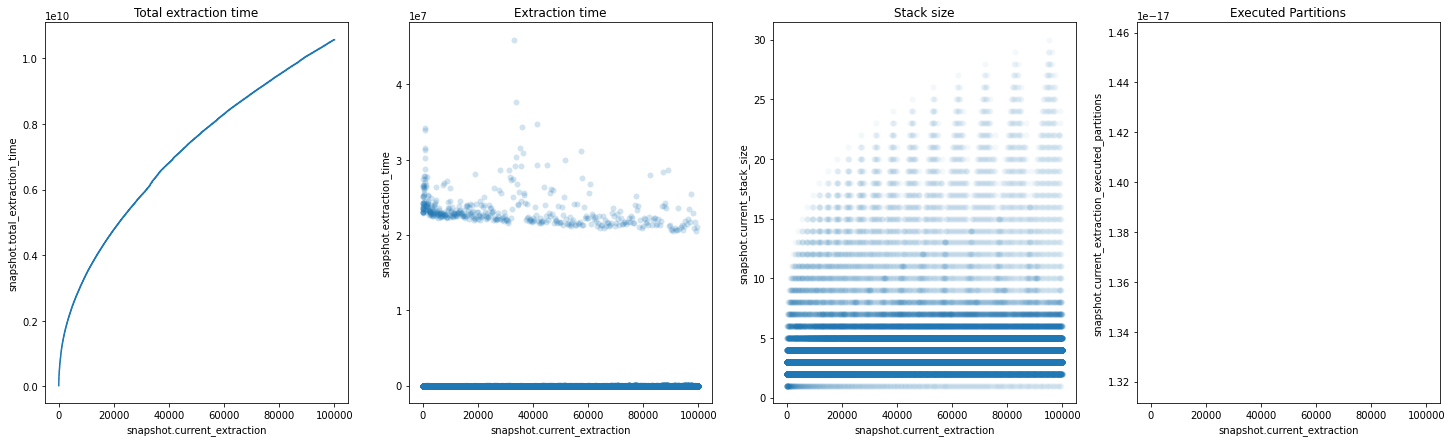

In [6]:
result = runner('/home/kuky_nekoi/magicode/program/base_benchmark/test_data/N_7_sorted.ascii', 
                '/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii', 
                10**6, 10**5, log_extraction_time=1)
result_df = pandas.read_csv("/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii")

plot_df = result_df[result_df["snapshot.snapshot_point"] == "EXTRACTION_STAGE_END"]

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=4, figsize=(25, 7))
#hue = "format_quality"
#hues = df_sample[hue].unique()
#palette = dict(zip(hues, seaborn.color_palette("hls", len(hues))))
seaborn.lineplot(x="snapshot.current_extraction", y="snapshot.total_extraction_time", data=plot_df, ax=axes[0]).set_title("Total extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.extraction_time", data=plot_df, linewidth=0, alpha=0.2, ax=axes[1]).set_title("Extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.current_stack_size", data=plot_df, linewidth=0, alpha=0.05, ax=axes[2]).set_title("Stack size")
seaborn.scatterplot(plot_df["snapshot.current_extraction"], plot_df["snapshot.current_extraction_executed_partitions"], linewidth=0, alpha=0.05, ax=axes[3]).set_title("Executed Partitions")

/home/kuky_nekoi/magicode/program/base_benchmark/main --log-pivot-time=0 --log-iteration-time=0 --log-extraction-time=1 --use-bfprt=0 --use-iiqs=0 --set-bfprt-alpha=0.3 --set-bfprt-beta=0.7 --set-random-seed=42 --input-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/N_7_desorted.ascii --output-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii --input-size=1000000 --extractions=100000
Amount of snapshots: 100000




Text(0.5, 1.0, 'Executed Partitions')

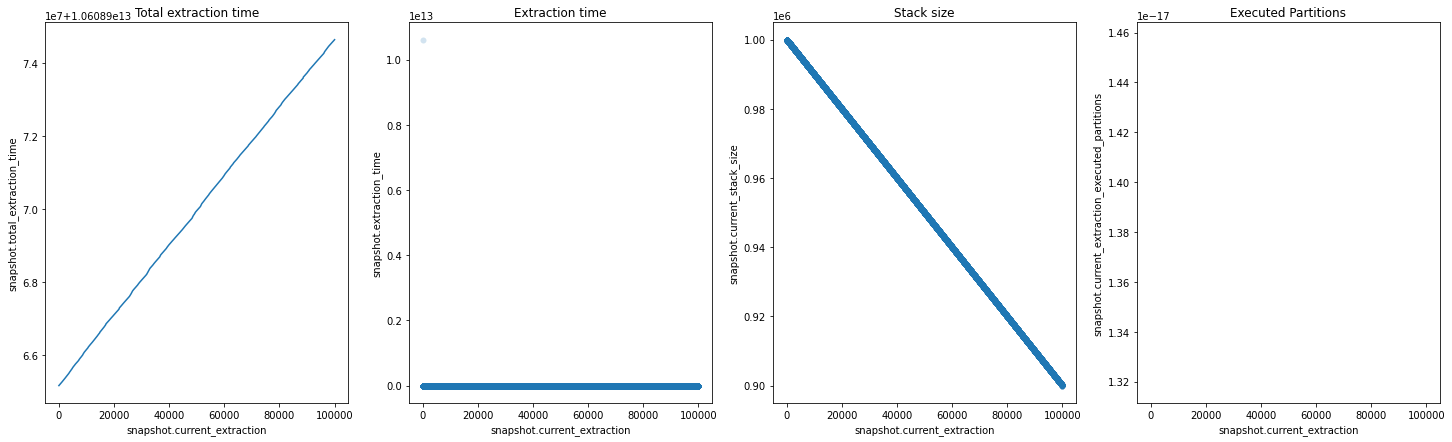

In [7]:
result = runner('/home/kuky_nekoi/magicode/program/base_benchmark/test_data/N_7_desorted.ascii', 
                '/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii', 
                10**6, 10**5, log_extraction_time=1)
result_df = pandas.read_csv("/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii")

plot_df = result_df[result_df["snapshot.snapshot_point"] == "EXTRACTION_STAGE_END"]

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=4, figsize=(25, 7))
#hue = "format_quality"
#hues = df_sample[hue].unique()
#palette = dict(zip(hues, seaborn.color_palette("hls", len(hues))))
seaborn.lineplot(x="snapshot.current_extraction", y="snapshot.total_extraction_time", data=plot_df, ax=axes[0]).set_title("Total extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.extraction_time", data=plot_df, linewidth=0, alpha=0.2, ax=axes[1]).set_title("Extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.current_stack_size", data=plot_df, linewidth=0, alpha=0.05, ax=axes[2]).set_title("Stack size")
seaborn.scatterplot(plot_df["snapshot.current_extraction"], plot_df["snapshot.current_extraction_executed_partitions"], linewidth=0, alpha=0.05, ax=axes[3]).set_title("Executed Partitions")

/home/kuky_nekoi/magicode/program/base_benchmark/main --log-pivot-time=0 --log-iteration-time=0 --log-extraction-time=1 --use-bfprt=0 --use-iiqs=0 --set-bfprt-alpha=0.3 --set-bfprt-beta=0.7 --set-random-seed=42 --input-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/bins.ascii --output-file=/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii --input-size=1000000 --extractions=100000
Amount of snapshots: 100000




Text(0.5, 1.0, 'Executed Partitions')

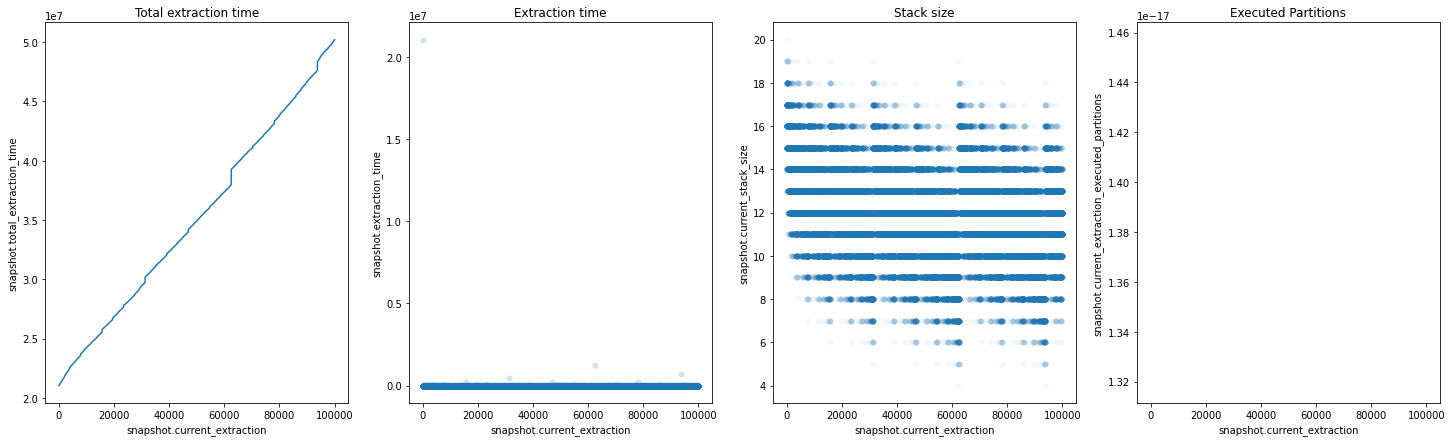

In [8]:
result = runner('/home/kuky_nekoi/magicode/program/base_benchmark/test_data/bins.ascii', 
                '/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii', 
                10**6, 10**5, log_extraction_time=1)
result_df = pandas.read_csv("/home/kuky_nekoi/magicode/program/base_benchmark/test_data/output_temp.ascii")

plot_df = result_df[result_df["snapshot.snapshot_point"] == "EXTRACTION_STAGE_END"]

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=4, figsize=(25, 7))
#hue = "format_quality"
#hues = df_sample[hue].unique()
#palette = dict(zip(hues, seaborn.color_palette("hls", len(hues))))
seaborn.lineplot(x="snapshot.current_extraction", y="snapshot.total_extraction_time", data=plot_df, ax=axes[0]).set_title("Total extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.extraction_time", data=plot_df, linewidth=0, alpha=0.2, ax=axes[1]).set_title("Extraction time")
seaborn.scatterplot(x="snapshot.current_extraction", y="snapshot.current_stack_size", data=plot_df, linewidth=0, alpha=0.05, ax=axes[2]).set_title("Stack size")
seaborn.scatterplot(plot_df["snapshot.current_extraction"], plot_df["snapshot.current_extraction_executed_partitions"], linewidth=0, alpha=0.05, ax=axes[3]).set_title("Executed Partitions")

In [ ]:
# Plot relationship between size, classes and entropy
entropy_series = []
for size in numpy.linspace(1, 1000, num=50, dtype=int):
    for classes in numpy.linspace(1, 1000, num=50, dtype=int):
        entropy_series.append(
            (size, classes, compute_shannon_entropy(generate_pconstrained_random(size, classes)))
        )

In [17]:
#import plotly.graph_objects as go
x = numpy.array(entropy_series)[:,0]
y = numpy.array(entropy_series)[:,1]
z = numpy.array(entropy_series)[:,2]
#fig = go.Figure(data=[go.Surface(x=x,y=y,z=z)])
#fig.update_layout()
#fig.show()

In [18]:
from mpl_toolkits import mplot3d

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

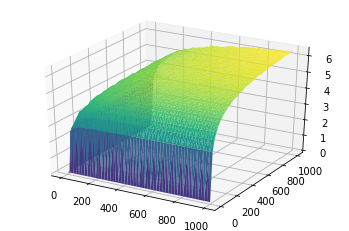

In [24]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

In [10]:
%%bash
pip install matplotlib